# Dataset: Daily Delhi Climate Dataset
# Author: Madalin Marian Porojan

# 1. Dataset Visualization

## Load

In [1414]:
import pandas as pd

df_test = pd.read_csv("a01_datasets/DailyDelhiClimateTest.csv", parse_dates=["date"], index_col="date")
df_train = pd.read_csv("a01_datasets/DailyDelhiClimateTrain.csv", parse_dates=["date"], index_col="date")

## Correct Typing 

In [1415]:
df_train.index=df_train.index.to_period('D')
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [1416]:
df_test.index=df_test.index.to_period('D')
df_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [1417]:
import numpy as np

df_train["meantemp"] = df_train["meantemp"].mask((df_train["meantemp"] >= 60), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["wind_speed"] = df_train["wind_speed"].mask((df_train["wind_speed"] <= 0) | (df_train["wind_speed"] >= 486), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["humidity"] = df_train["humidity"].mask(df_train["humidity"] >= 100, np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["meanpressure"] = df_train["meanpressure"].mask((df_train["meanpressure"] <= 870) | (df_train["meanpressure"] >= 1100), np.nan) # remove negative/zero pressure values. They don't make sense in this context

df_train = df_train.bfill().ffill()

## Plot Time Series Data

In [1418]:
import matplotlib.pyplot as plt

def visualize_dataset(df):
    
    # Training data
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Additive decomposition plots
    df["meantemp"][df.index.year == 2013].plot(ax=axes[0], linestyle='-', label="Mean Temperature", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df["humidity"][df.index.year == 2013].plot(ax=axes[1], linestyle='-', label="Humidity", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df["wind_speed"][df.index.year == 2013].plot(ax=axes[2], linestyle='-', label="Wind Speed", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df["meanpressure"][df.index.year == 2016].plot(ax=axes[3], linestyle='-', label="Mean Pressure", grid=True, legend=True, xlabel="Date", ylabel="Values")
    
    plt.show()

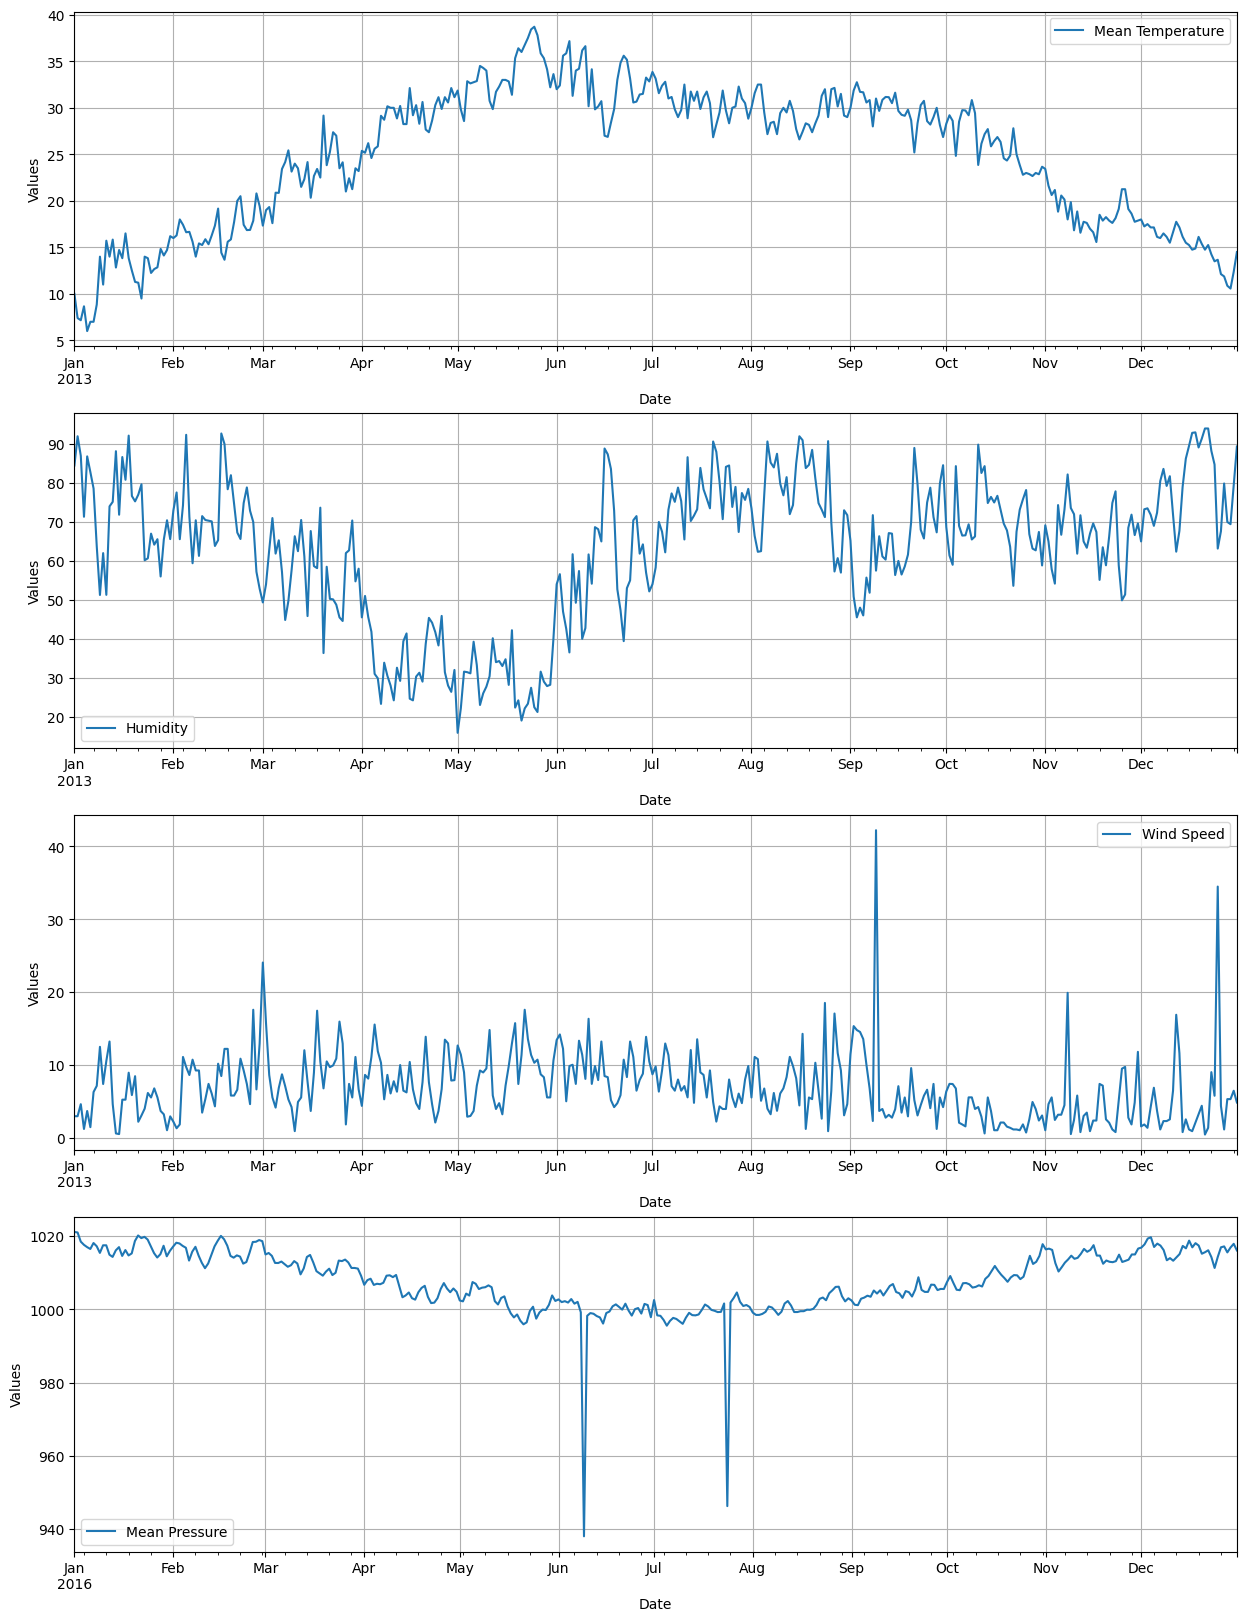

In [1419]:
visualize_dataset(df_train)

# 2. Statistical Analysis

## Mean

In [1420]:
df_train.mean()

meantemp          25.495521
humidity          60.762810
wind_speed         6.859648
meanpressure    1008.168505
dtype: float64

## Variance

In [1421]:
df_train.var()

meantemp         53.994614
humidity        280.638724
wind_speed       20.343161
meanpressure     61.218046
dtype: float64

## Change over time of Mean and Variance 

In [1422]:
yearly_stats = df_train['meantemp'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean        var
date                      
2013  24.791494  54.896169
2014  25.010673  57.719487
2015  25.114591  52.385837
2016  27.103373  47.451002
2017  10.000000        NaN


In [1423]:
yearly_stats = df_train['humidity'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean         var
date                       
2013  63.046292  330.934231
2014  59.767942  263.117169
2015  61.430490  246.281105
2016  58.740174  272.655433
2017  87.000000         NaN


In [1424]:
yearly_stats = df_train['wind_speed'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

          mean        var
date                     
2013  6.932006  22.523680
2014  6.818408  21.136125
2015  6.500295  21.909188
2016  7.185715  15.795749
2017  7.325000        NaN


In [1425]:
yearly_stats = df_train['meanpressure'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

             mean        var
date                        
2013  1007.642172  60.141881
2014  1008.347166  58.416038
2015  1008.834821  55.166131
2016  1007.829333  70.755500
2017  1016.000000        NaN


In [1426]:
def rolling_window(column: str):
    window_size = 30
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    df_train[column].rolling(window=window_size, min_periods=1).mean().plot(ax=ax[0])
    ax[0].set_title(f'{window_size}-Day Rolling Mean of {column}')
    df_train[column].rolling(window=window_size, min_periods=1).var().plot(ax=ax[1])
    ax[1].set_title(f'{window_size}-Day Rolling Variance of {column}')

    plt.tight_layout()
    plt.show()

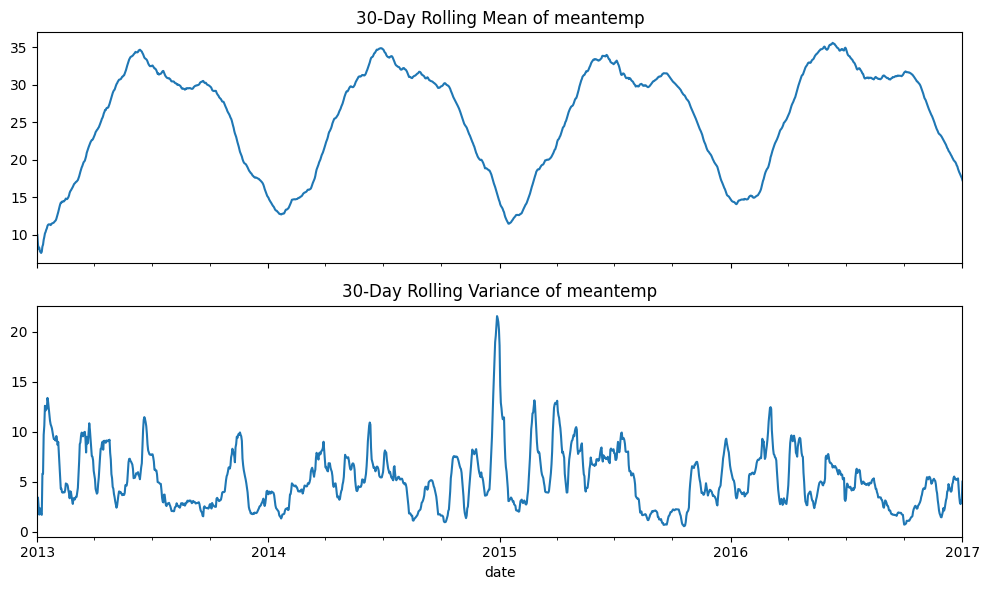

In [1427]:
rolling_window("meantemp")

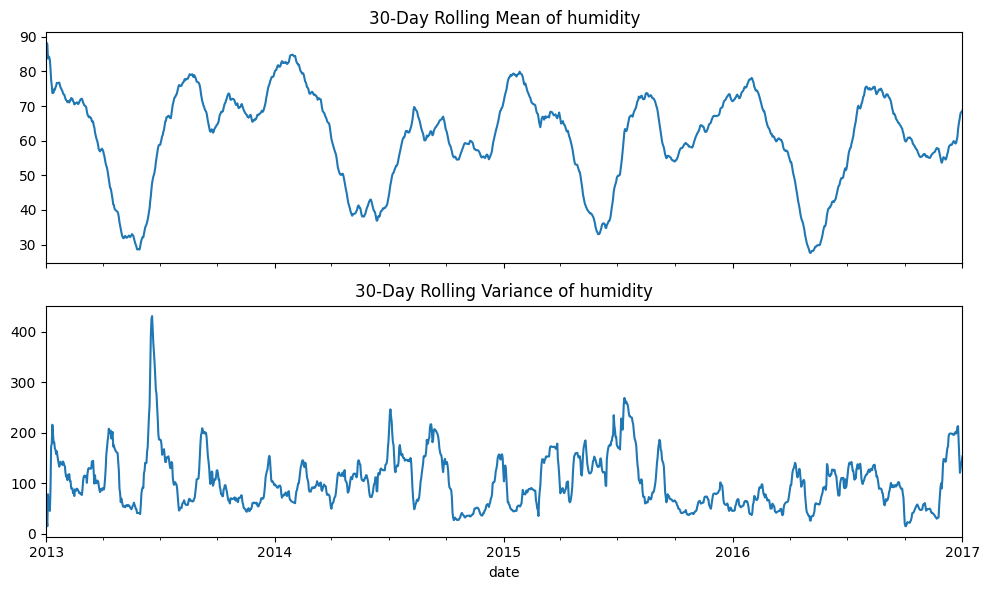

In [1428]:
rolling_window("humidity")

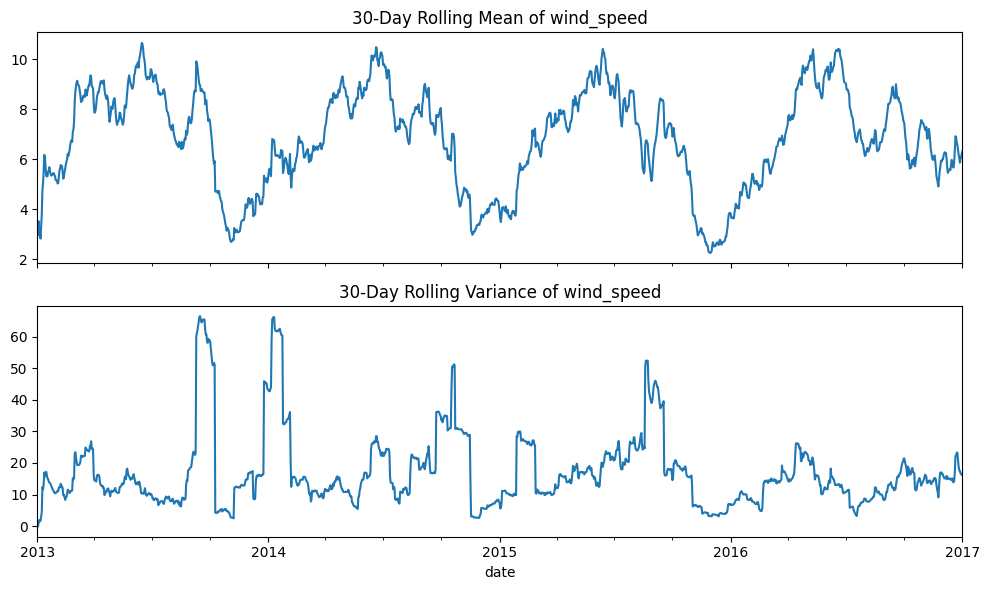

In [1429]:
rolling_window("wind_speed")

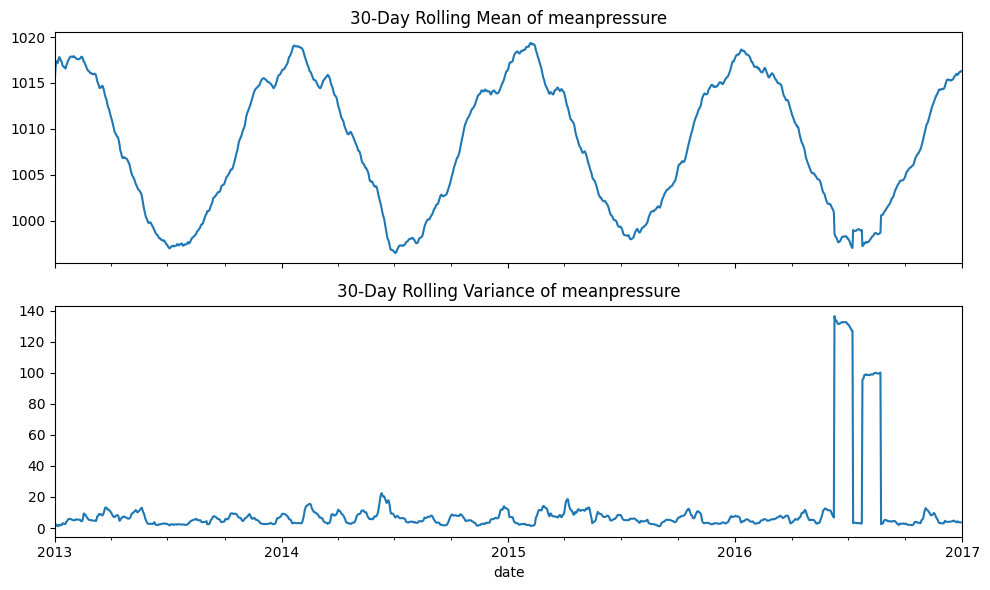

In [1430]:
rolling_window("meanpressure")

### Based on all the graphs and data, the data set is non-stationary. The mean and variance are all over the place. Each year is different, indicating that the weather data has a natural randomness like in real life

## Augmented Dickey-Fuller test

In [1431]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    """
    Perform ADF test and print results
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out)
    
    d = 0
    p = out[1]
    while p > 0.05:
        result = adfuller(series.diff().dropna(), autolag='AIC')
        p = result[1]
        d += 1
    print(f'Order of Differencing is {d}')
    print('---')


In [1432]:
adf_test(df_train['meantemp'], title='meantemp')

Augmented Dickey-Fuller Test: meantemp
ADF Statistic             -2.021069
p-value                    0.277412
# Lags Used               10.000000
# Observations Used     1451.000000
Critical Value (1%)       -3.434865
Critical Value (5%)       -2.863534
Critical Value (10%)      -2.567832
dtype: float64
Order of Differencing is 1
---


C:\Users\FIFP698\AppData\Local\Temp\ipykernel_9664\2299831844.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = out[1]


- Critical Values: Compared with ADF Statistic, the value is higher than all the critical values at 1, 5, and 10%, meaning the condition of having at least one less negative value than ADF Statistic value fails. 
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => has a unit root (non stationary)

In [1433]:
adf_test(df_train['humidity'], title='humidity')

Augmented Dickey-Fuller Test: humidity
ADF Statistic             -3.717605
p-value                    0.003872
# Lags Used               15.000000
# Observations Used     1446.000000
Critical Value (1%)       -3.434880
Critical Value (5%)       -2.863541
Critical Value (10%)      -2.567835
dtype: float64
Order of Differencing is 0
---


C:\Users\FIFP698\AppData\Local\Temp\ipykernel_9664\2299831844.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = out[1]


- Critical Values: Compared with ADF Statistic, the value is lower than all the critical values => stationary
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => does not have a unit root (stationary)

In [1434]:
adf_test(df_train['wind_speed'], title='wind_speed')

Augmented Dickey-Fuller Test: wind_speed
ADF Statistic             -3.932039
p-value                    0.001811
# Lags Used               24.000000
# Observations Used     1437.000000
Critical Value (1%)       -3.434909
Critical Value (5%)       -2.863553
Critical Value (10%)      -2.567842
dtype: float64
Order of Differencing is 0
---


C:\Users\FIFP698\AppData\Local\Temp\ipykernel_9664\2299831844.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = out[1]


- Critical Values: Compared with ADF Statistic, the value is lower than all the critical values => stationary
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => does not have a unit root (stationary)

In [1435]:
adf_test(df_train['meanpressure'], title='meanpressure')

Augmented Dickey-Fuller Test: meanpressure
ADF Statistic             -2.248398
p-value                    0.189151
# Lags Used               11.000000
# Observations Used     1450.000000
Critical Value (1%)       -3.434868
Critical Value (5%)       -2.863535
Critical Value (10%)      -2.567832
dtype: float64
Order of Differencing is 1
---


C:\Users\FIFP698\AppData\Local\Temp\ipykernel_9664\2299831844.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = out[1]


- Critical Values: Compared with ADF Statistic the test fails
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => has a unit root (non-stationary)

# 3. Correlation Testing

## Durbin-Watson test

- DW = 2 - no autocorrelation
- DW < 2 positive autocorrelation
- DW > 2 negative autocorrelation

In [1436]:
from statsmodels.stats.stattools import durbin_watson

print(durbin_watson(df_train['meantemp']))

0.003963175920494487


Very strong autocorrelation

In [1437]:
print(durbin_watson(df_train['humidity']))

0.017102149301537015


Very strong autocorrelation

In [1438]:
print(durbin_watson(df_train['wind_speed']))

0.3423141821996743


Strong autocorrelation

In [1439]:
print(durbin_watson(df_train['meanpressure']))

1.1764683086336135e-05


Very strong autocorrelation

The results indicate in other words that each day's value is highly dependent on the previous day's value.

## ACF and PACF Analysis

In [1440]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def pacf(column: str):
    fig, ax = plt.subplots(2, 1,figsize=(10,7))
    plot_acf(df_train[column], ax=ax[0], title=f'Autocorrelation Function (ACF) for {column}')
    plot_pacf(df_train[column], ax=ax[1], method='ywm', title=f'Partial Autocorrelation Function (PACF) for {column}')
    plt.title(f'Partial Autocorrelation Function (PACF) for {column}')
    plt.show()

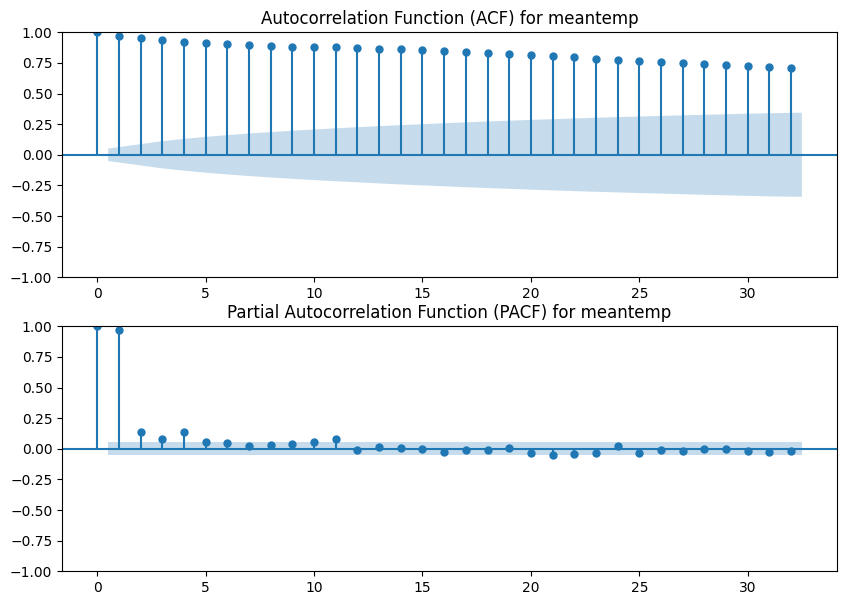

In [1441]:
pacf('meantemp')

- ACF: Autocorrelation starts off high (lag 1) and remains positive for many lags before decaying. Suggests strong positive autocorrelation and non-stationarity
- PACF: Prominent spike at lag 1 => depends strongly on preceding value but subsequent lags are much smaller indicated a limited direct influence of further lags (lag 2 onwards). Consistent with **AR(1) regressive model**

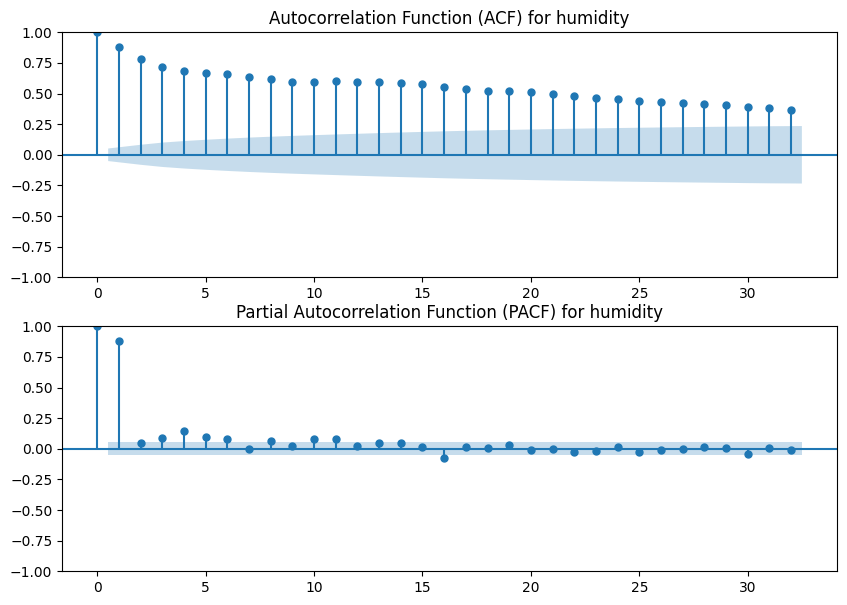

In [1442]:
pacf('humidity')

- ACF: Autocorrelation starts off high (lag 1) and remains positive for many lags before decaying. Suggests strong positive autocorrelation and non-stationarity but based on ADF test that showed a low p-value, the series is likely stationary but exhibits significant short-term autocorrelation
- PACF: Prominent spike at lag 1 => depends strongly on preceding value but subsequent lags are much smaller indicated a limited direct influence of further lags (lag 2 onwards). Consistent with **SARIMA** model

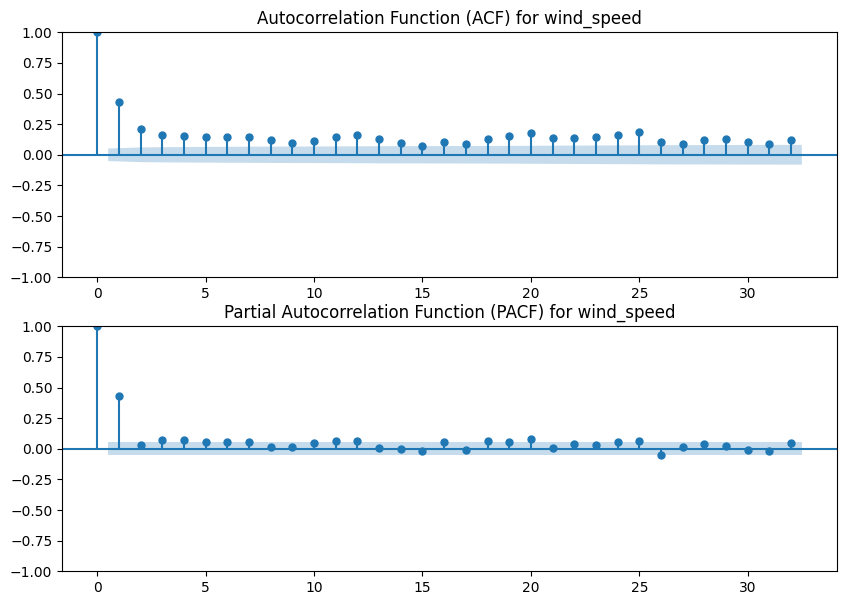

In [1443]:
pacf('wind_speed')

- ACF: Autocorrelation starts off high (lag 1) after which the autocorrelation drops quickly and hovers near zero. Suggests short term dependence. Today's wind speed is correlated with yesterday's wind speed but the influence fades rapidly for longer lags
- PACF: Prominent spike at lag 1; AR(1) type process
- p:1, q:2

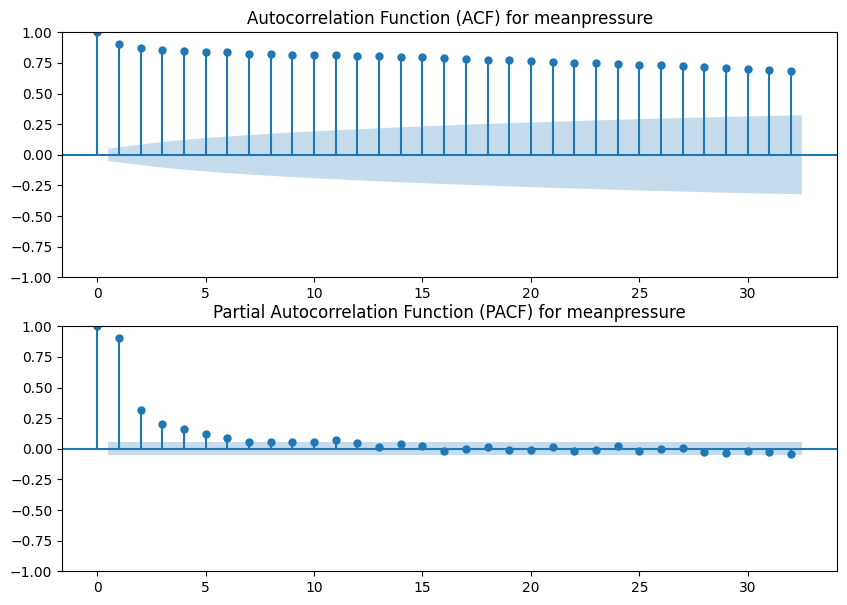

In [1444]:
pacf('meanpressure')

- ACF: Autocorrelation remains strongly positive over many lags and decays gradually, indicating a long memory or non-stationary process
- PACF: Prominent spike at lag 1; suggesting that the most immediate past value of meanpressure is highly influential.

# 4. Frequency Domain Decomposition

In [1445]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

def fdd(column: str):
    data = df_train[column].values
    N = len(data)  # Number of data points
    dt = 1.0       # Time step, e.g., 1 day between observations

    # Remove the mean to focus on oscillations around zero
    data_detrended = data - np.mean(data)

    # Compute the FFT
    yf = np.fft.fft(data_detrended)

    # Compute corresponding frequencies
    xf = np.fft.fftfreq(N, d=dt)

    # Keep only the positive frequencies (the spectrum is symmetric)
    mask = xf >= 0
    xf = xf[mask]
    yf = yf[mask]
    
    plt.figure(figsize=(8, 4))
    plt.plot(xf, np.abs(yf))
    plt.title(f'FFT of the Time Series for {column}')
    plt.xlabel('Frequency (cycles per day)' if dt==1 else 'Frequency')
    plt.ylabel('Amplitude')
    plt.show()
    
    frequencies, psd = periodogram(data_detrended, fs=1.0/dt)
    plt.figure(figsize=(8,4))
    plt.semilogy(frequencies, psd)  # semilog-y is common to visualize wide PSD ranges
    plt.title(f'Periodogram for {column}')
    plt.xlabel('Frequency (cycles per day)' if dt==1 else 'Frequency')
    plt.ylabel('Power Spectral Density')
    plt.show()


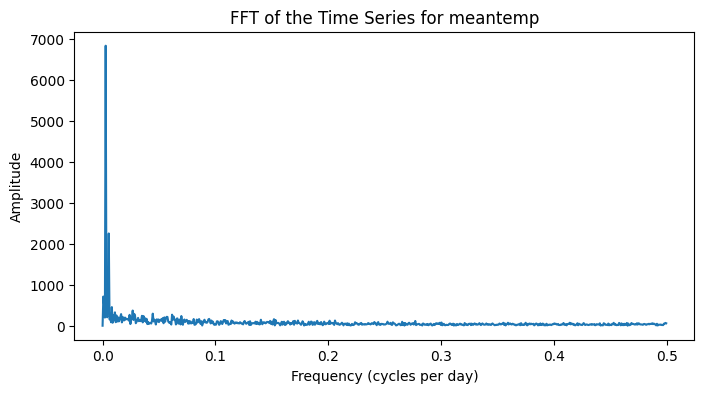

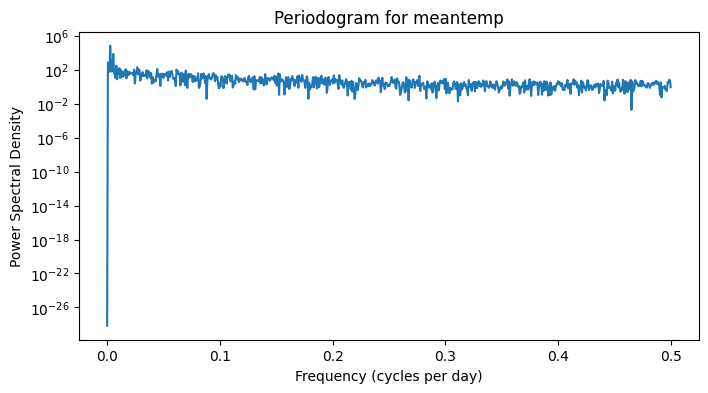

In [1446]:
fdd('meantemp')

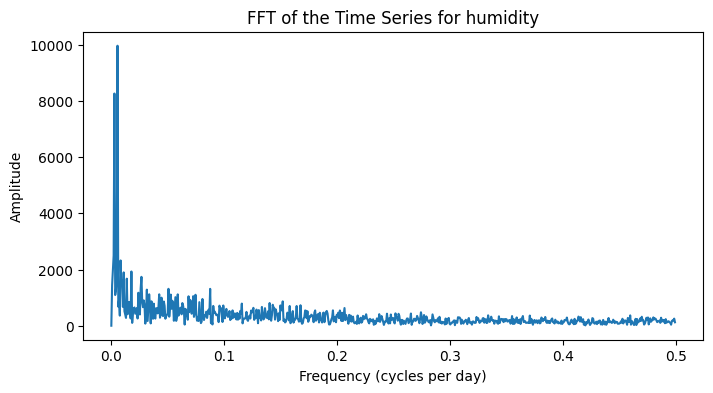

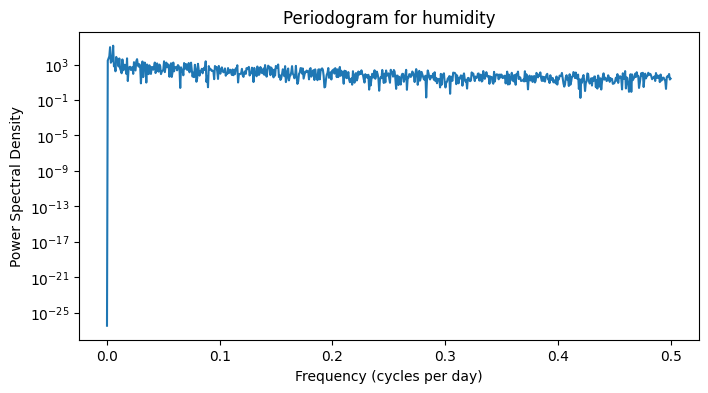

In [1447]:
fdd('humidity')

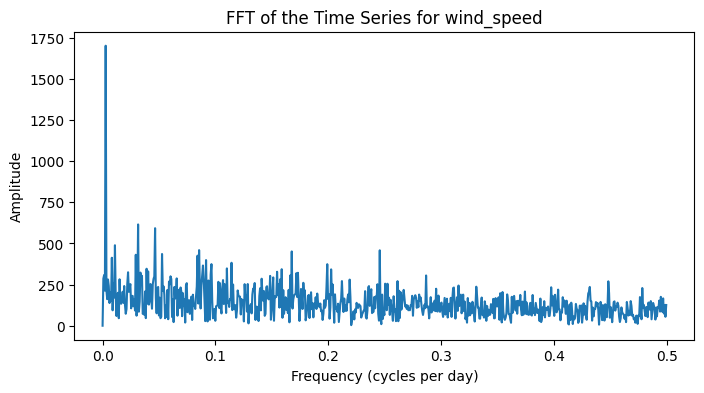

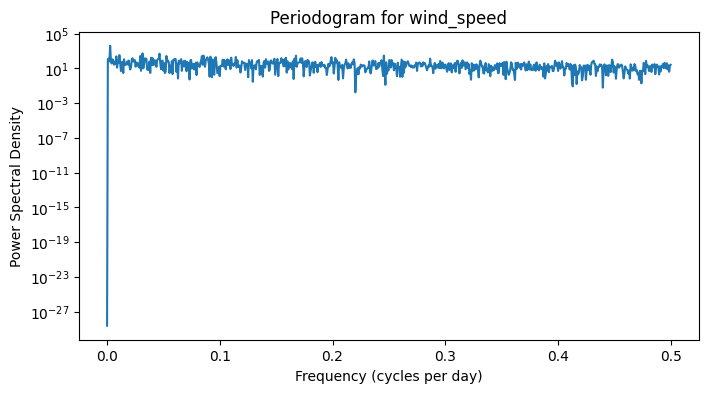

In [1448]:
fdd('wind_speed')

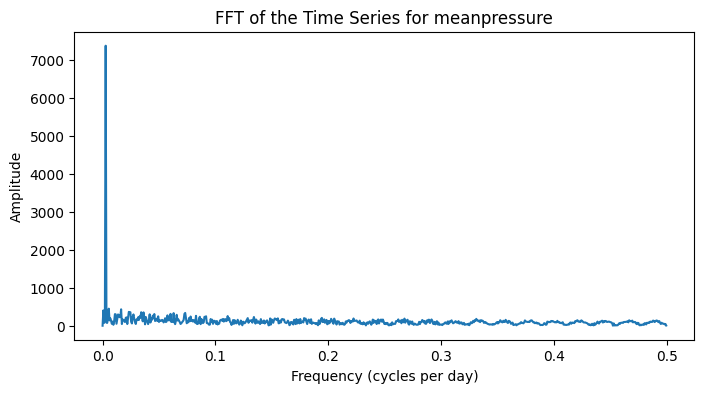

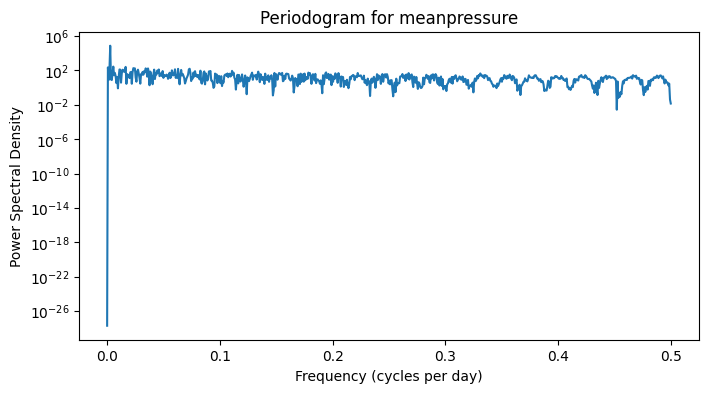

In [1449]:
fdd('meanpressure')

# 5. Time Series Forecasting

## 5.1 ARIMA Model

In [1450]:
import warnings
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def __fit_MODEL(title:str, model_class_name:str, column: str, p, d, q):
    best_aic = np.inf
    best_order = None

    for pdq in itertools.product(p, d, q):
        try:
            if model_class_name == 'SARIMAX':   
                model = SARIMAX(df_train[column], order=pdq, seasonal_order=pdq+(12,))
            elif model_class_name == 'ARMA' or model_class_name == 'ARIMA':
                model = ARIMA(df_train[column], order=pdq)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = pdq
        except Exception as e:
            continue

    print(f"Best {title} order:", best_order)
    print("Best AIC:", best_aic)

    # Fit final model
    model = ARIMA(df_train[column], order=best_order)
    results = model.fit()
    print(results.summary())
    
    # Forecast for the length of the test set
    n_forecast = len(df_test[column])
    forecast = results.forecast(steps=n_forecast)

    # Evaluate performance
    from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    mae = mean_absolute_error(df_test[column].head(n_forecast), forecast)
    mape = mean_absolute_percentage_error(df_test[column].head(n_forecast), forecast)
    rmse = root_mean_squared_error(df_test[column].head(n_forecast), forecast)
    print(f"Test: {rmse=} {mape=} {rmse=}")
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    forecast.plot(ax=ax[0], title=f'{title} Forecast of {column}')
    df_test[column][:n_forecast].plot(ax=ax[1], title=f'Test Data for {column}')
    
    
def fit_ARIMA(column: str):
    p = d = q = range(0, 3)
    __fit_MODEL('ARIMA', 'ARIMA', column, p, d, q)
    
    
def fit_ARMA(column: str):
    p = q = range(0, 3)
    __fit_MODEL('ARMA', 'ARIMA', column, p, (0, 0, 0), q)
    
def fit_SARIMA(column: str):
    p = d = q = range(0, 3)
    __fit_MODEL('SARIMAX', 'SARIMAX', column, p, d, q)

Best ARMA order: (2, 0, 1)
Best AIC: 5551.067680027226
                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2770.534
Date:                Sun, 30 Mar 2025   AIC                           5551.068
Time:                        22:33:31   BIC                           5577.505
Sample:                    01-01-2013   HQIC                          5560.929
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8733      4.018      5.444      0.000      13.998      29.748
ar.L1          1.5661      0.048     32.754      0.000       1.472       1.6

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order: (1, 2, 2)
Best AIC: 5523.001985121201
                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2757.501
Date:                Sun, 30 Mar 2025   AIC                           5523.002
Time:                        22:33:35   BIC                           5544.147
Sample:                    01-01-2013   HQIC                          5530.890
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6875      0.027     25.525      0.000       0.635       0.740
ma.L1         -1.9168      0.016   -119.698      0.000      -1.948      -1.

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible 

Best SARIMAX order: (2, 0, 1)
Best AIC: 5557.218778033115
                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2770.534
Date:                Sun, 30 Mar 2025   AIC                           5551.068
Time:                        22:35:02   BIC                           5577.505
Sample:                    01-01-2013   HQIC                          5560.929
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8733      4.018      5.444      0.000      13.998      29.748
ar.L1          1.5661      0.048     32.754      0.000       1.472       

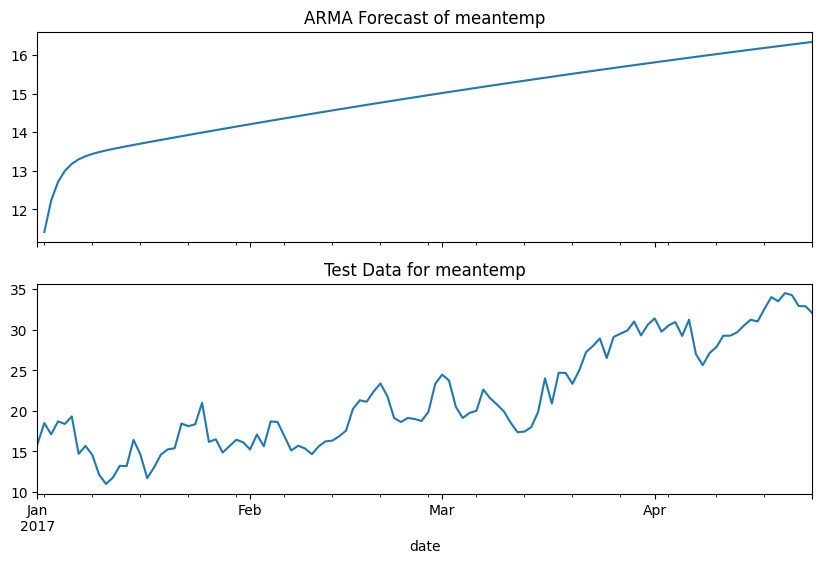

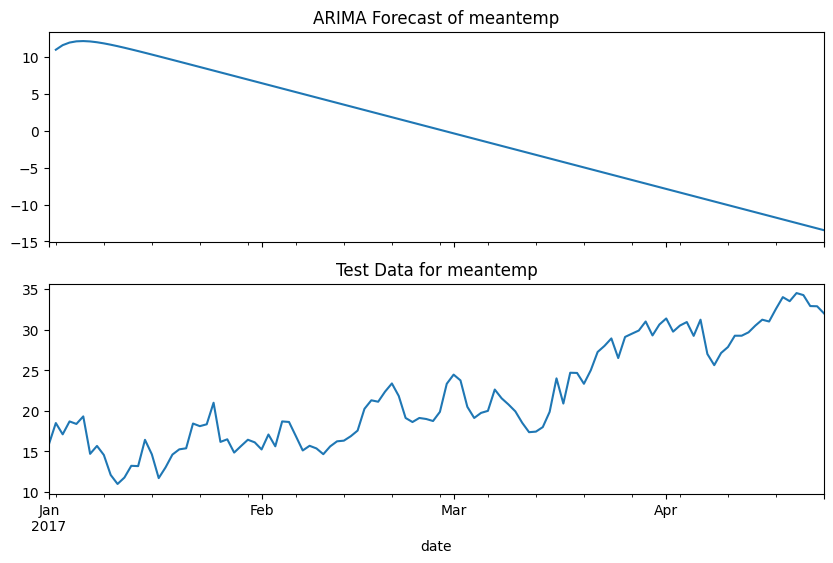

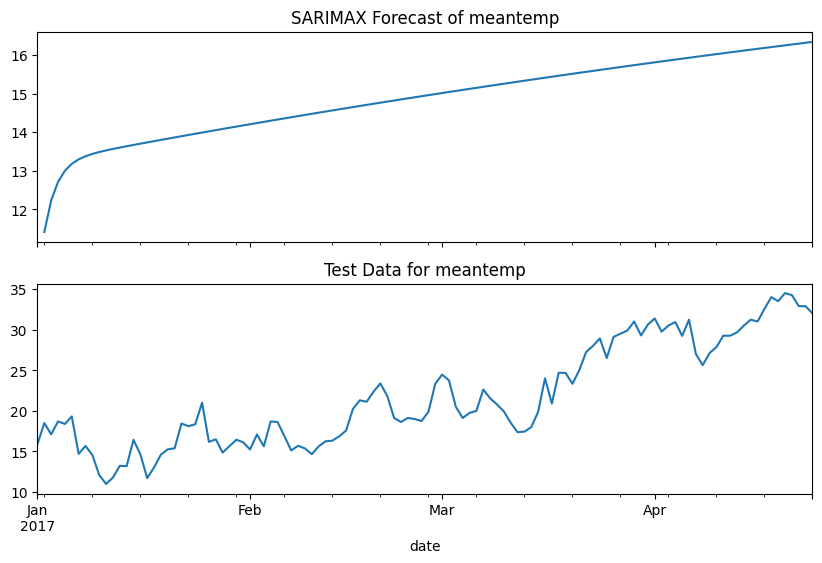

In [1451]:
fit_ARMA('meantemp')
fit_ARIMA('meantemp')
fit_SARIMA('meantemp')

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

Best ARMA order: (2, 0, 2)
Best AIC: 10161.552326037516


c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5074.776
Date:                Sun, 30 Mar 2025   AIC                          10161.552
Time:                        22:35:09   BIC                          10193.278
Sample:                    01-01-2013   HQIC                         10173.386
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0257      3.987     15.556      0.000      54.211      69.841
ar.L1          1.5144      0.065     23.357      0.000       1.387       1.641
ar.L2         -0.5225      0.063     -8.324      0.0

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

Best ARIMA order: (2, 1, 1)
Best AIC: 10159.123611711051
                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5075.562
Date:                Sun, 30 Mar 2025   AIC                          10159.124
Time:                        22:35:13   BIC                          10180.271
Sample:                    01-01-2013   HQIC                         10167.012
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6572      0.033     20.202      0.000       0.593       0.721
ar.L2         -0.0855      0.028     -3.073      0.002      -0.140      -0

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

Best SARIMAX order: (2, 1, 1)
Best AIC: 10142.678828623506
                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5075.562
Date:                Sun, 30 Mar 2025   AIC                          10159.124
Time:                        22:36:57   BIC                          10180.271
Sample:                    01-01-2013   HQIC                         10167.012
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6572      0.033     20.202      0.000       0.593       0.721
ar.L2         -0.0855      0.028     -3.073      0.002      -0.140      

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


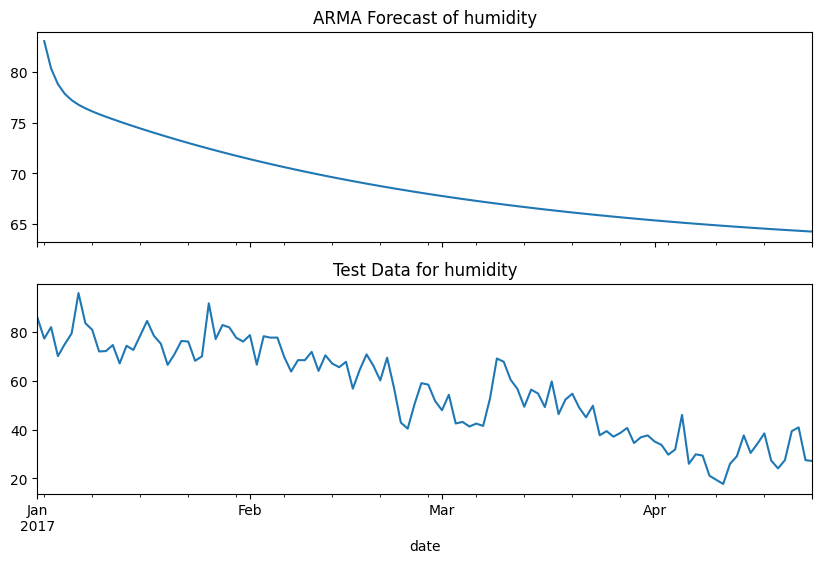

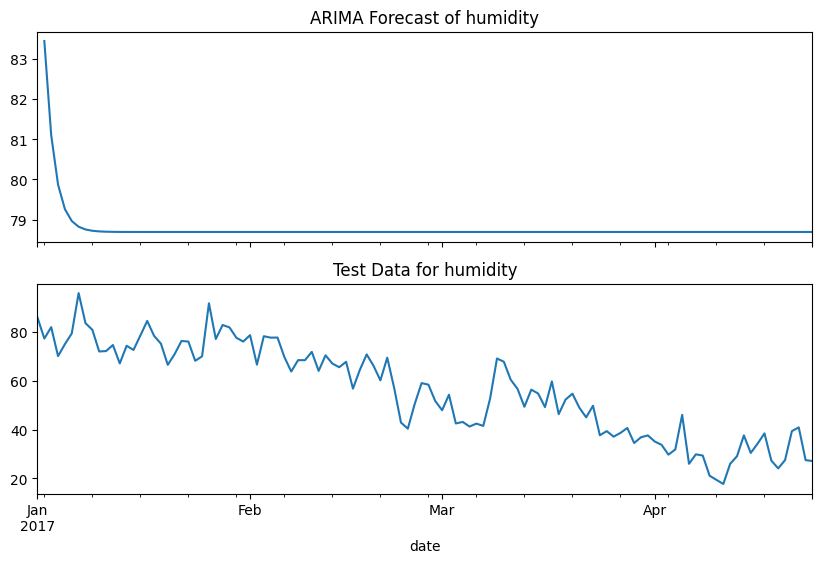

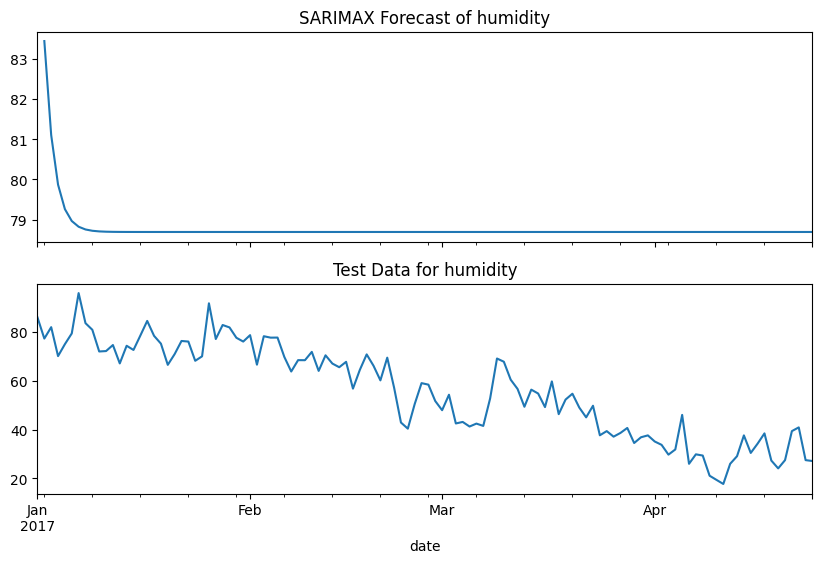

In [1452]:
fit_ARMA('humidity')
fit_ARIMA('humidity')
fit_SARIMA('humidity')

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Best ARMA order: (2, 0, 2)
Best AIC: 8206.482556796036
                               SARIMAX Results                                
Dep. Variable:             wind_speed   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4097.241
Date:                Sun, 30 Mar 2025   AIC                           8206.483
Time:                        22:37:02   BIC                           8238.208
Sample:                    01-01-2013   HQIC                          8218.317
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8124      0.706      9.655      0.000       5.429       8.195
ar.L1          1.2042      0.083     14.568      0.000       1.042       1.3

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Best ARIMA order: (2, 0, 2)
Best AIC: 8206.482556796036
                               SARIMAX Results                                
Dep. Variable:             wind_speed   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4097.241
Date:                Sun, 30 Mar 2025   AIC                           8206.483
Time:                        22:37:07   BIC                           8238.208
Sample:                    01-01-2013   HQIC                          8218.317
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8124      0.706      9.655      0.000       5.429       8.195
ar.L1          1.2042      0.083     14.568      0.000       1.042       1.

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

Best SARIMAX order: (1, 1, 1)
Best AIC: 8200.586929051771
                               SARIMAX Results                                
Dep. Variable:             wind_speed   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4100.774
Date:                Sun, 30 Mar 2025   AIC                           8207.547
Time:                        22:38:45   BIC                           8223.408
Sample:                    01-01-2013   HQIC                          8213.464
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3344      0.017     19.459      0.000       0.301       0.368
ma.L1         -0.9591      0.008   -124.551      0.000      -0.974      -

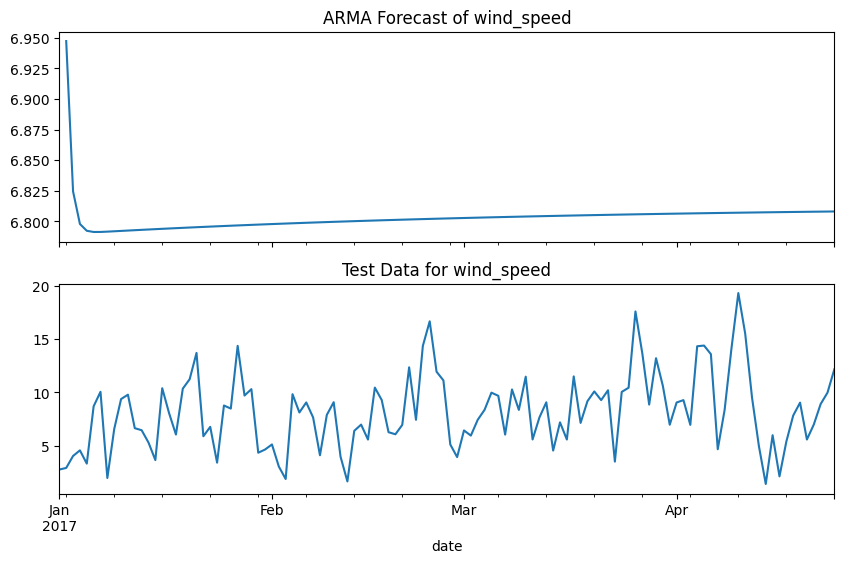

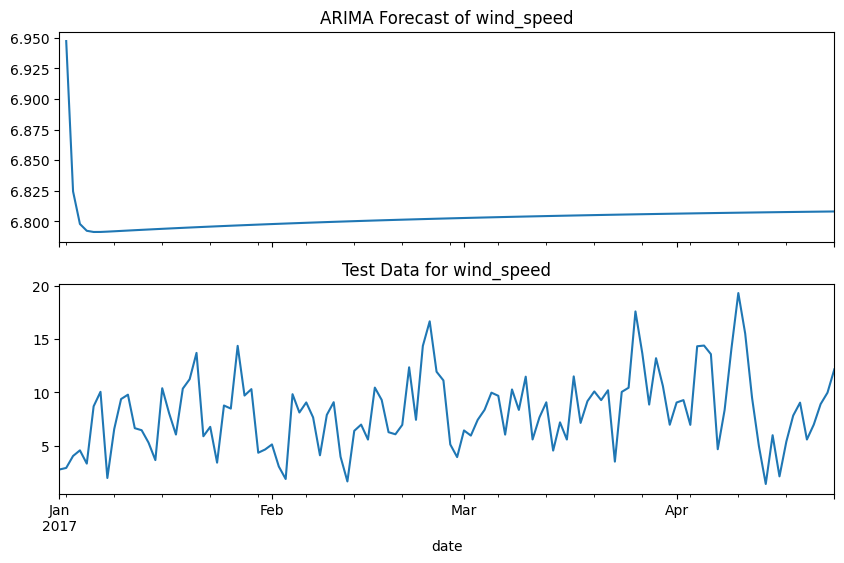

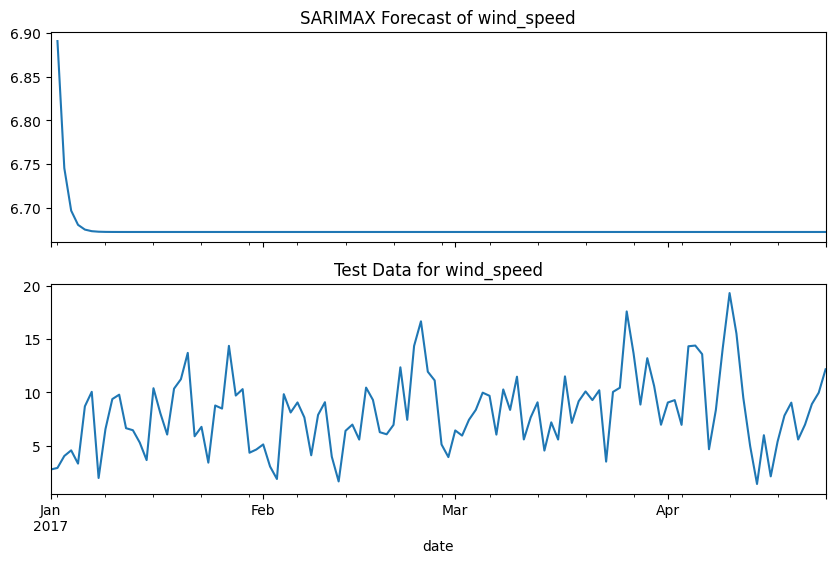

In [1453]:
fit_ARMA('wind_speed')
fit_ARIMA('wind_speed')
fit_SARIMA('wind_speed')

Best ARMA order: (2, 0, 1)
Best AIC: 7387.008908945601
                               SARIMAX Results                                
Dep. Variable:           meanpressure   No. Observations:                 1462
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3688.504
Date:                Sun, 30 Mar 2025   AIC                           7387.009
Time:                        22:38:50   BIC                           7413.447
Sample:                    01-01-2013   HQIC                          7396.871
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1009.7704      5.302    190.462      0.000     999.379    1020.162
ar.L1          1.2682      0.025     49.906      0.000       1.218       1.3

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order: (1, 2, 2)
Best AIC: 7378.008126081605
                               SARIMAX Results                                
Dep. Variable:           meanpressure   No. Observations:                 1462
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -3685.004
Date:                Sun, 30 Mar 2025   AIC                           7378.008
Time:                        22:38:55   BIC                           7399.153
Sample:                    01-01-2013   HQIC                          7385.896
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3648      0.016     22.527      0.000       0.333       0.396
ma.L1         -1.8920      0.019   -100.391      0.000      -1.929      -1.

c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\FIFP698\Documents\UNI\TSA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters f

Best SARIMAX order: (1, 0, 0)
Best AIC: 6.0
                               SARIMAX Results                                
Dep. Variable:           meanpressure   No. Observations:                 1462
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3853.081
Date:                Sun, 30 Mar 2025   AIC                           7712.163
Time:                        22:40:28   BIC                           7728.025
Sample:                    01-01-2013   HQIC                          7718.080
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.2638      1.686    597.847      0.000    1004.958    1011.569
ar.L1          0.9022      0.005    183.744      0.000       0.893       0.912
sigma2  

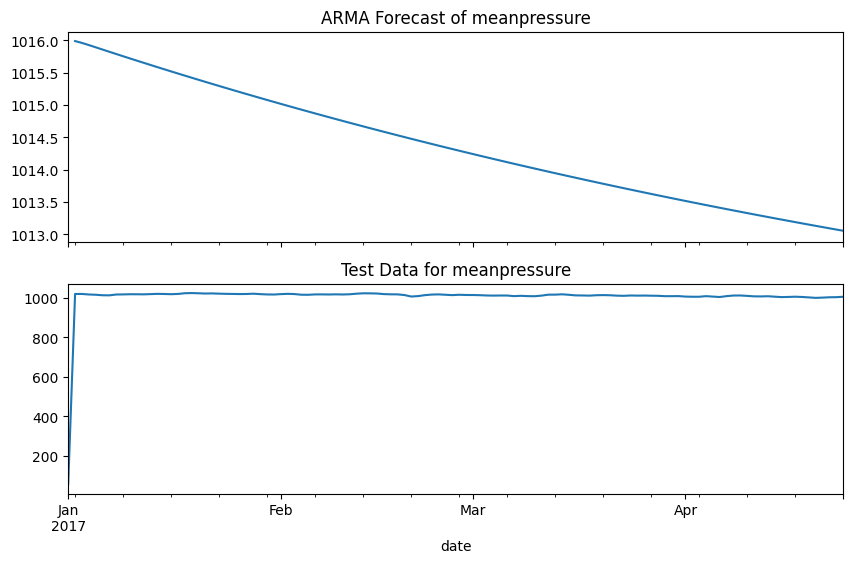

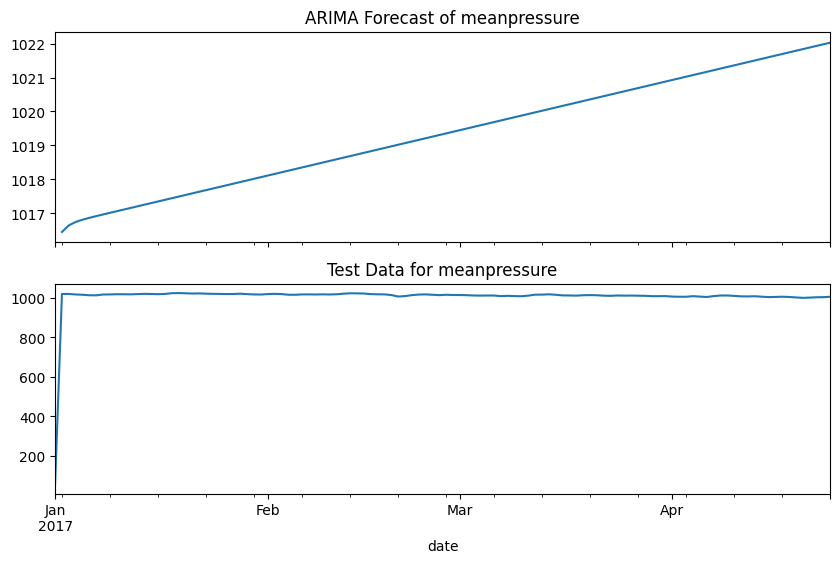

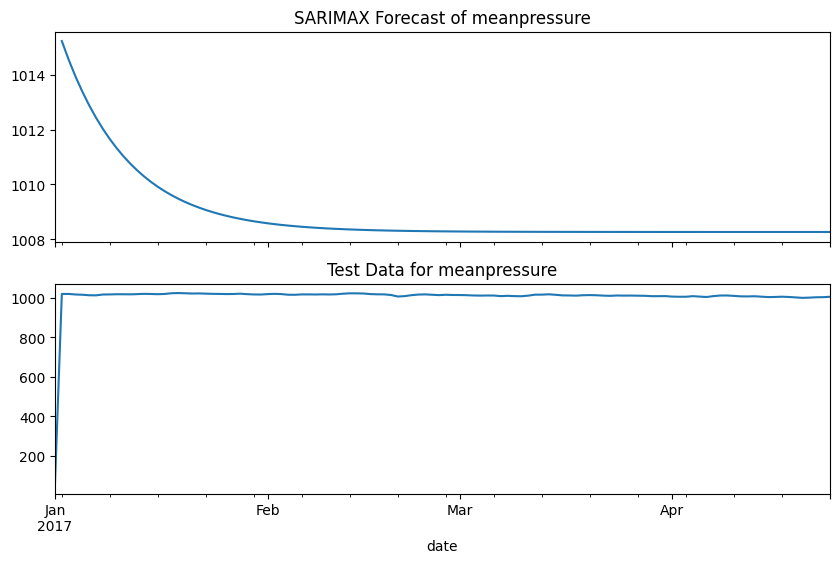

In [1454]:
fit_ARMA('meanpressure')
fit_ARIMA('meanpressure')
fit_SARIMA('meanpressure')

## Multivariate

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Mar, 2025
Time:                     22:40:28
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.64144
Nobs:                     1457.00    HQIC:                   9.45045
Log likelihood:          -14987.4    FPE:                    11348.0
AIC:                      9.33679    Det(Omega_mle):         10716.7
--------------------------------------------------------------------
Results for equation meantemp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  16.891271        15.850980            1.066           0.287
L1.meantemp             0.804876         0.036311           22.166           0.000
L1.humidity             0.007834         0.007569

<Axes: xlabel='Date', ylabel='Values'>

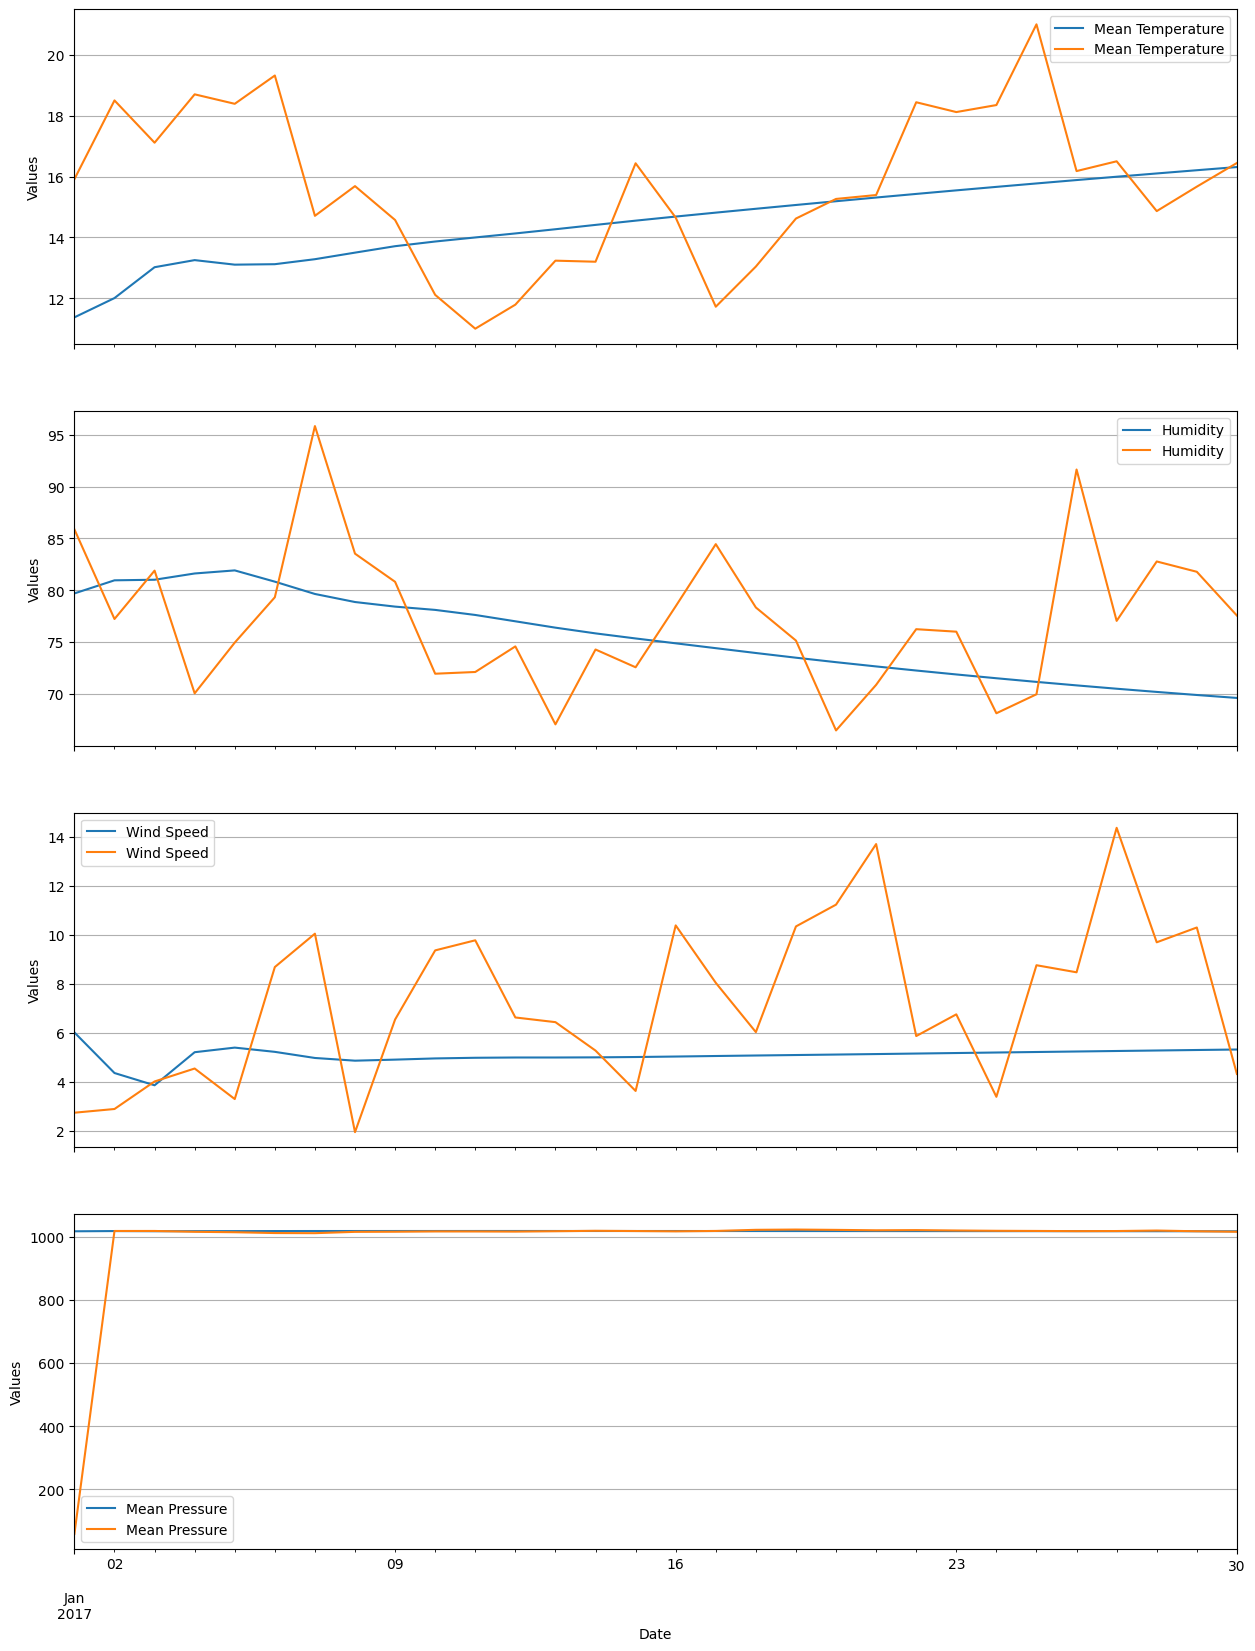

In [1455]:
from statsmodels.tsa.api import VAR

# For VAR, all series should be stationary or differenced as needed
model_var = VAR(df_train)
results_var = model_var.fit(maxlags=5, ic='aic')
print(results_var.summary())

# Forecast next steps
n_forecast = 30
forecast_vals = results_var.forecast(df_train.values[-results_var.k_ar:], steps=n_forecast)
forecast_vals_df = pd.DataFrame(forecast_vals, index=df_test.head(n_forecast).index, columns=['meantemp', 'humidity', 'wind_speed', 'meanpressure'])
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(df_test.head(n_forecast), forecast_vals)
mape = mean_absolute_percentage_error(df_test.head(n_forecast), forecast_vals)
rmse = root_mean_squared_error(df_test.head(n_forecast), forecast_vals)
print(f"Test: {rmse=} {mape=} {rmse=}")


# Training data
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
# Additive decomposition plots
forecast_vals_df["meantemp"].plot(ax=axes[0], linestyle='-', label="Mean Temperature", grid=True, legend=True, xlabel="Date", ylabel="Values")
df_test.head(n_forecast)["meantemp"].plot(ax=axes[0], linestyle='-', label="Mean Temperature", grid=True, legend=True, xlabel="Date", ylabel="Values")
forecast_vals_df["humidity"].plot(ax=axes[1], linestyle='-', label="Humidity", grid=True, legend=True, xlabel="Date", ylabel="Values")
df_test.head(n_forecast)["humidity"].plot(ax=axes[1], linestyle='-', label="Humidity", grid=True, legend=True, xlabel="Date", ylabel="Values")
forecast_vals_df["wind_speed"].plot(ax=axes[2], linestyle='-', label="Wind Speed", grid=True, legend=True, xlabel="Date", ylabel="Values")
df_test.head(n_forecast)["wind_speed"].plot(ax=axes[2], linestyle='-', label="Wind Speed", grid=True, legend=True, xlabel="Date", ylabel="Values")
forecast_vals_df["meanpressure"].plot(ax=axes[3], linestyle='-', label="Mean Pressure", grid=True, legend=True, xlabel="Date", ylabel="Values")
df_test.head(n_forecast)["meanpressure"].plot(ax=axes[3], linestyle='-', label="Mean Pressure", grid=True, legend=True, xlabel="Date", ylabel="Values")
